# MATERIAL DIDÁCTICO
## Ireric De La Rosa Ruíz

### ESPEJOS CÓNCAVOS Y CONVEXOS
#### Prototipo 1
Se busca representar el trazado de rayos en espejos delgados (cóncavos y convexos): 

$\cdot$ Dibuja rayos principales.

$\cdot$ Calcula y muestra la posición de la imagen.

$\cdot$ Describe si es imagen real o virtual.

$\cdot$ Describe si la imagen sale derecha o invertida.

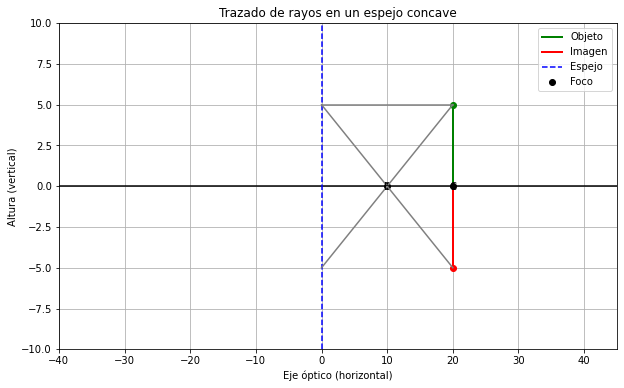

Distancia de la imagen: 20.00 unidades
Altura de la imagen: -5.00 unidades
La imagen es real y invertida


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ray_diagram(f, do, ho, mirror_type='concave'):
    """
    f: distancia focal (positiva para cóncavo, negativa para convexo)
    do: distancia del objeto (positiva si está delante del espejo)
    ho: altura del objeto
    mirror_type: 'concave' o 'convex'
    """
    # Cálculo de la imagen usando la ecuación del espejo
    try:
        di = 1 / (1/f - 1/do)
    except ZeroDivisionError:
        di = np.inf
    
    hi = -di/do * ho  # altura de la imagen (negativa = invertida)
    
    # Setup del gráfico
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(-2*abs(do), 2*abs(di) + 5)
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.axhline(0, color='black')  # eje óptico

    # Puntos clave
    C = 2*f  # centro de curvatura
    O = 0    # vértice del espejo

    # Objeto
    ax.plot([do, do], [0, ho], 'g', linewidth=2, label='Objeto')
    ax.plot(do, ho, 'go')

    # Imagen
    if np.isfinite(di):
        color = 'r' if di > 0 else 'orange'
        ax.plot([di, di], [0, hi], color=color, linewidth=2, label='Imagen')
        ax.plot(di, hi, 'o', color=color)

    # Espejo (vertical)
    ax.axvline(0, color='blue', linestyle='--', label='Espejo')

    # Puntos focales y centro
    ax.plot([f], [0], 'ko', label='Foco')
    ax.text(f, -0.2, 'F', fontsize=10, ha='center')
    ax.plot([C], [0], 'ko')
    ax.text(C, -0.2, 'C', fontsize=10, ha='center')

    # Rayos principales
    # Rayo paralelo al eje óptico, que pasa por F (o parece venir de F en convexo)
    ax.plot([do, 0], [ho, ho], 'gray')  # rayo paralelo
    if mirror_type == 'concave':
        ax.plot([0, di], [ho, hi], 'gray')  # rayo reflejado que pasa por F
    else:  # convexo
        ax.plot([0, do], [ho, ho], 'gray')
        ax.plot([0, di], [ho, hi], 'gray', linestyle='--')  # prolongación

    # Rayo que pasa por F y se refleja paralelo (o parece ir hacia F)
    if mirror_type == 'concave':
        ax.plot([do, f], [ho, 0], 'gray')  # hacia el foco
        ax.plot([f, 0], [0, hi], 'gray')   # reflejado paralelo
    else:
        ax.plot([do, 0], [ho, hi], 'gray')
        ax.plot([0, f], [hi, 0], 'gray', linestyle='--')

    # Títulos
    ax.set_title('Trazado de rayos en un espejo {}'.format(mirror_type))
    ax.set_xlabel('Eje óptico (horizontal)')
    ax.set_ylabel('Altura (vertical)')
    ax.legend()
    ax.grid(True)
    plt.show()

    # Info imagen
    tipo = "real" if di > 0 else "virtual"
    orientacion = "invertida" if hi < 0 else "derecha"
    print(f"Distancia de la imagen: {di:.2f} unidades")
    print(f"Altura de la imagen: {hi:.2f} unidades")
    print(f"La imagen es {tipo} y {orientacion}")

# Ejemplo de uso:
ray_diagram(f=10, do=20, ho=5, mirror_type='concave')


#### Prototipo 2
Se busca representar el trazado de rayos en espejos delgados (cóncavos y convexos) 

$\cdot$ Dibuja rayos principales.

$\cdot$ Calcula y muestra la posición de la imagen.

$\cdot$ Describe si es imagen real o virtual.

$\cdot$ Describe si la imagen sale derecha o invertida.

Agragando sliders para modificar:

$\cdot$ Distancia forcal

$\cdot$ Distancia del objeto

$\cdot$ Tipo del espejo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown
import ipywidgets as widgets

def ray_diagram_interactivo(f, do, ho, mirror_type):
    try:
        di = 1 / (1/f - 1/do)
    except ZeroDivisionError:
        di = np.inf
    hi = -di/do * ho

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(-2*abs(do), 2*abs(di) + 5)
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.axhline(0, color='black')  # eje óptico

    C = 2*f
    O = 0

    ax.plot([do, do], [0, ho], 'g', linewidth=2, label='Objeto')
    ax.plot(do, ho, 'go')

    if np.isfinite(di):
        color = 'r' if di > 0 else 'orange'
        ax.plot([di, di], [0, hi], color=color, linewidth=2, label='Imagen')
        ax.plot(di, hi, 'o', color=color)

    ax.axvline(0, color='blue', linestyle='--', label='Espejo')
    ax.plot([f], [0], 'ko', label='Foco')
    ax.text(f, -0.2, 'F', fontsize=10, ha='center')
    ax.plot([2*f], [0], 'ko')
    ax.text(2*f, -0.2, 'C', fontsize=10, ha='center')

    # Rayos principales
    ax.plot([do, 0], [ho, ho], 'gray')  # rayo paralelo
    if mirror_type == 'concave':
        ax.plot([0, di], [ho, hi], 'gray')  # rayo reflejado que pasa por F
        ax.plot([do, f], [ho, 0], 'gray')
        ax.plot([f, 0], [0, hi], 'gray')
    else:
        ax.plot([0, do], [ho, ho], 'gray')
        ax.plot([0, di], [ho, hi], 'gray', linestyle='--')
        ax.plot([do, 0], [ho, hi], 'gray')
        ax.plot([0, f], [hi, 0], 'gray', linestyle='--')

    ax.set_title('Trazado de rayos - Espejo {}'.format(mirror_type))
    ax.set_xlabel('Eje óptico (horizontal)')
    ax.set_ylabel('Altura (vertical)')
    ax.legend()
    ax.grid(True)
    plt.show()

    tipo = "real" if di > 0 else "virtual"
    orientacion = "invertida" if hi < 0 else "derecha"
    print(f"Distancia de la imagen: {di:.2f}")
    print(f"Altura de la imagen: {hi:.2f}")
    print(f"La imagen es {tipo} y {orientacion}")

# Interfaz interactiva
interact(ray_diagram_interactivo,
         f=FloatSlider(value=10, min=1, max=30, step=1, description='Focal (f)'),
         do=FloatSlider(value=20, min=5, max=100, step=1, description='Obj. Dist (do)'),
         ho=FloatSlider(value=5, min=1, max=20, step=0.5, description='Obj. Altura (ho)'),
         mirror_type=Dropdown(options=['concave', 'convex'], value='concave', description='Tipo espejo'));


interactive(children=(FloatSlider(value=10.0, description='Focal (f)', max=30.0, min=1.0, step=1.0), FloatSlid…

#### Prototipo 3
Se busca representar el trazado de rayos en espejos delgados (cóncavos y convexos) 

$\cdot$ Dibuja rayos principales marcados con diferentes colores para mejorar su distinción.
En caso de las prolongaciones de rayos para imágenes virtuales se marca una línea punteada.

$\cdot$ Calcula y muestra la posición de la imagen.

$\cdot$ Describe si es imagen real o virtual.

$\cdot$ Describe si la imagen sale derecha o invertida.

Agragando sliders para modificar:

$\cdot$ Distancia forcal

$\cdot$ Distancia del objeto

$\cdot$ Tipo del espejo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown
import ipywidgets as widgets

def ray_diagram_interactivo(f, do, ho, mirror_type):
    try:
        di = 1 / (1/f - 1/do)
    except ZeroDivisionError:
        di = np.inf
    hi = -di/do * ho

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(-2*abs(do), 2*abs(do))
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.axhline(0, color='black')  # eje óptico

    C = 2*f
    O = 0

    # Objeto
    ax.plot([do, do], [0, ho], color='green', linewidth=2, label='Objeto')
    ax.plot(do, ho, 'go')

    # Imagen
    if np.isfinite(di):
        img_color = 'red' if di > 0 else 'orange'
        ax.plot([di, di], [0, hi], color=img_color, linewidth=2, label='Imagen')
        ax.plot(di, hi, 'o', color=img_color)

    # Espejo
    ax.axvline(0, color='blue', linestyle='--', label='Espejo')
    ax.plot([f], [0], 'ko', label='Foco')
    ax.text(f, -0.2, 'F', fontsize=10, ha='center')
    ax.plot([2*f], [0], 'ko')
    ax.text(2*f, -0.2, 'C', fontsize=10, ha='center')

    # RAYO 1: Paralelo al eje → pasa por foco
    ax.plot([do, 0], [ho, ho], color='red', label='Rayo 1: paralelo → foco')
    if mirror_type == 'concave':
        ax.plot([0, di], [ho, hi], color='red')
    else:
        ax.plot([0, do], [ho, ho], color='red')
        ax.plot([0, di], [ho, hi], color='red', linestyle='--')

    # RAYO 2: Pasa por foco → se refleja paralelo
    if mirror_type == 'concave':
        ax.plot([do, f], [ho, 0], color='blue', label='Rayo 2: foco → paralelo')
        ax.plot([f, 0], [0, hi], color='blue')
    else:
        ax.plot([do, 0], [ho, hi], color='blue', label='Rayo 2: hacia foco → paralelo')
        ax.plot([0, f], [hi, 0], color='blue', linestyle='--')

    # RAYO 3 (opcional): Hacia el centro → reflejado sobre sí mismo
    if mirror_type == 'concave':
        ax.plot([do, 2*f], [ho, 0], color='green', linestyle='--', label='Rayo 3: C → C (opcional)')

    # Leyendas y etiquetas
    ax.set_title('Trazado de rayos - Espejo {}'.format(mirror_type))
    ax.set_xlabel('Eje óptico (horizontal)')
    ax.set_ylabel('Altura (vertical)')
    ax.legend(loc='upper right')
    ax.grid(True)
    plt.show()

    tipo = "real" if di > 0 else "virtual"
    orientacion = "invertida" if hi < 0 else "derecha"
    print(f"Distancia de la imagen: {di:.2f}")
    print(f"Altura de la imagen: {hi:.2f}")
    print(f"La imagen es {tipo} y {orientacion}")

# Interfaz interactiva
interact(ray_diagram_interactivo,
         f=FloatSlider(value=10, min=1, max=30, step=1, description='Focal (f)'),
         do=FloatSlider(value=20, min=5, max=100, step=1, description='Obj. Dist (do)'),
         ho=FloatSlider(value=5, min=1, max=20, step=0.5, description='Obj. Altura (ho)'),
         mirror_type=Dropdown(options=['concave', 'convex'], value='concave', description='Tipo espejo'));


interactive(children=(FloatSlider(value=10.0, description='Focal (f)', max=30.0, min=1.0, step=1.0), FloatSlid…

#### Prototipo 4
Se busca representar el trazado de rayos en espejos delgados (cóncavos y convexos) 

$\cdot$ Dibuja rayos principales marcados con diferentes colores para mejorar su distinción.
En caso de las prolongaciones de rayos para imágenes virtuales se marca una línea punteada.

$\cdot$ Calcula y muestra la posición de la imagen.

$\cdot$ Describe si es imagen real o virtual.

$\cdot$ Describe si la imagen sale derecha o invertida.

Agragando sliders para modificar:

$\cdot$ Distancia forcal

$\cdot$ Distancia del objeto

$\cdot$ Tipo del espejo

##### Leyenda de colores:
$\cdot$ Objeto: rojo

$\cdot$ Imagen: rosa

$\cdot$ Espejo: azul

$\cdot$ Foco: punto verde

$\cdot$ Rayo 1: paralelo al eje óptico y pasa por foco: morado

$\cdot$ Rayo 2: pasa por foco y se refleja paralelo: lila

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

def ray_diagram_interactivo(f, do, ho, mirror_type):
    try:
        di = 1 / (1/f - 1/do)
    except ZeroDivisionError:
        di = np.inf
    hi = -di/do * ho

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(-2*abs(do), 2*abs(do))
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.axhline(0, color='black')  # eje óptico

    C = 2*f
    O = 0

    # Objeto (rojo)
    ax.plot([do, do], [0, ho], color='red', linewidth=2, label='Objeto')
    ax.plot(do, ho, 'ro')

    # Imagen (rosa)
    if np.isfinite(di):
        ax.plot([di, di], [0, hi], color='pink', linewidth=2, label='Imagen')
        ax.plot(di, hi, 'o', color='pink')

    # Espejo (azul)
    ax.axvline(0, color='blue', linestyle='--', label='Espejo')

    # Foco (verde)
    ax.plot([f], [0], 'go', label='Foco')
    ax.text(f, -0.2, 'F', fontsize=10, ha='center')
    ax.plot([2*f], [0], 'ko')
    ax.text(2*f, -0.2, 'C', fontsize=10, ha='center')

    # RAYO 1: Paralelo al eje → pasa por foco (morado)
    ax.plot([do, 0], [ho, ho], color='purple', label='Rayo 1: paralelo → foco')
    if mirror_type == 'concave':
        ax.plot([0, di], [ho, hi], color='purple')
    else:
        ax.plot([0, do], [ho, ho], color='purple')
        ax.plot([0, di], [ho, hi], color='purple', linestyle='--')

    # RAYO 2: Pasa por foco → se refleja paralelo (lila)
    if mirror_type == 'concave':
        ax.plot([do, f], [ho, 0], color='violet', label='Rayo 2: foco → paralelo')
        ax.plot([f, 0], [0, hi], color='violet')
    else:
        ax.plot([do, 0], [ho, hi], color='violet', label='Rayo 2: hacia foco → paralelo')
        ax.plot([0, f], [hi, 0], color='violet', linestyle='--')

    ax.set_title('Trazado de rayos - Espejo {}'.format(mirror_type))
    ax.set_xlabel('Eje óptico (horizontal)')
    ax.set_ylabel('Altura (vertical)')
    ax.legend(loc='upper right')
    ax.grid(True)
    plt.show()

    tipo = "real" if di > 0 else "virtual"
    orientacion = "invertida" if hi < 0 else "derecha"
    print(f"Distancia de la imagen: {di:.2f}")
    print(f"Altura de la imagen: {hi:.2f}")
    print(f"La imagen es {tipo} y {orientacion}")

# Interfaz interactiva
interact(ray_diagram_interactivo,
         f=FloatSlider(value=10, min=1, max=30, step=1, description='Focal (f)'),
         do=FloatSlider(value=20, min=5, max=100, step=1, description='Obj. Dist (do)'),
         ho=FloatSlider(value=5, min=1, max=20, step=0.5, description='Obj. Altura (ho)'),
         mirror_type=Dropdown(options=['concave', 'convex'], value='concave', description='Tipo espejo'));


interactive(children=(FloatSlider(value=10.0, description='Focal (f)', max=30.0, min=1.0, step=1.0), FloatSlid…

#### Prototipo 5
Se busca representar el trazado de rayos en espejos delgados (cóncavos y convexos) 

$\cdot$ Dibuja rayos principales marcados con diferentes colores para mejorar su distinción.
En caso de las prolongaciones de rayos para imágenes virtuales se marca una línea punteada.

$\cdot$ Calcula y muestra la posición de la imagen.

$\cdot$ Describe si es imagen real o virtual.

$\cdot$ Describe si la imagen sale derecha o invertida.

Agragando sliders para modificar:

$\cdot$ Distancia forcal

$\cdot$ Distancia del objeto

$\cdot$ Tipo del espejo

##### Leyenda de colores:
$\cdot$ Objeto: rojo

$\cdot$ Imagen: rosa

$\cdot$ Espejo: azul

$\cdot$ Foco: punto verde

$\cdot$ Rayo 1: paralelo al eje óptico y pasa por foco: morado

$\cdot$ Rayo 2: pasa por foco y se refleja paralelo: lila

$\cdot$ Rayo 3: se refleja paralelo al eje óptico

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

def espejo_ray_tracing(f, do, ho, tipo):
    # Foco según tipo
    f = f if tipo == 'cóncavo' else -f

    # Distancia imagen usando fórmula de espejos
    try:
        di = 1 / (1/f - 1/do)
    except ZeroDivisionError:
        di = np.inf
    hi = -di/do * ho

    # Posiciones
    x_obj = -do
    x_img = x_obj + di
    x_espejo = 0
    x_foco = f

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(x_espejo, color='blue', linestyle='--', label='Espejo')

    # Objeto (rojo)
    ax.plot([x_obj, x_obj], [0, ho], color='red', linewidth=2, label='Objeto')
    ax.plot(x_obj, ho, 'ro')

    # Imagen (rosa)
    ax.plot([x_img, x_img], [0, hi], color='pink', linewidth=2, label='Imagen')
    ax.plot(x_img, hi, 'o', color='pink')

    # Foco (punto verde)
    ax.plot(x_foco, 0, 'go', label='Foco')

    # Rayo 1: paralelo al eje → pasa por el foco (morado)
    ax.plot([x_obj, 0], [ho, ho], color='purple', label='Rayo 1')
    ax.plot([0, x_img], [ho, hi], color='purple')

    # Rayo 2: pasa por el centro (lila)
    ax.plot([x_obj, x_img], [ho, hi], color='violet', label='Rayo 2')

    # Rayo 3: hacia el foco → se refleja paralelo (azul cielo)
    ax.plot([x_obj, f], [ho, 0], color='skyblue', label='Rayo 3 (hacia foco)')
    ax.plot([0, x_img], [ho, ho], color='skyblue')

    ax.set_xlim(x_obj - 10, x_img + 10)
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.set_title(f'Trazado de rayos en un espejo {tipo}')
    ax.set_xlabel('Eje óptico')
    ax.set_ylabel('Altura')
    ax.legend()
    ax.grid(True)
    plt.show()

    tipo_imagen = "real" if di > 0 else "virtual"
    orientacion = "invertida" if hi < 0 else "derecha"
    print(f"📍 Imagen a {abs(di):.2f} mm del espejo")
    print(f"🖼️ Altura imagen: {hi:.2f}")
    print(f"🪞 Imagen {tipo_imagen}, {orientacion}")

# Interfaz
interact(espejo_ray_tracing,
         f=FloatSlider(value=20, min=5, max=50, step=1, description='Focal'),
         do=FloatSlider(value=60, min=10, max=150, step=1, description='Dist. objeto'),
         ho=FloatSlider(value=10, min=1, max=50, step=1, description='Altura objeto'),
         tipo=Dropdown(options=['cóncavo', 'convexo'], value='cóncavo', description='Tipo de espejo'));


interactive(children=(FloatSlider(value=20.0, description='Focal', max=50.0, min=5.0, step=1.0), FloatSlider(v…

### LENTES DELGADAS DIVERGENTES Y CONVERGENTES
#### Prototipo 1
A diferencia de los espejos, en este caso, los rayos se refractan, no se reflejan.

##### Consideraciones:
$\cdot$ En lentes convergentes, los rayos realmente se cruzan → imagen real (si el objeto está fuera del foco).

$\cdot$ En lentes divergentes, los rayos se separan → imagen siempre virtual y derecha.

$\cdot$ El código permite ver el comportamiento ajustando la distancia del objeto, foco y su altura.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

def lente_diagram_interactivo(f, do, ho, lens_type):
    # Ajuste de signo para tipo de lente
    f = f if lens_type == 'convergente' else -f
    
    try:
        di = 1 / (1/f - 1/do)
    except ZeroDivisionError:
        di = np.inf
    hi = -di/do * ho

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(-1.5*abs(do), 1.5*abs(do))
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.axhline(0, color='black')  # eje óptico

    # Lente (azul)
    ax.axvline(0, color='blue', linestyle='--', label='Lente')

    # Focos (verde)
    ax.plot([f, -f], [0, 0], 'go', label='Foco')
    ax.text(f, -0.3, 'F', fontsize=10, ha='center')
    ax.text(-f, -0.3, 'F\'', fontsize=10, ha='center')

    # Objeto (rojo)
    ax.plot([do, do], [0, ho], color='red', linewidth=2, label='Objeto')
    ax.plot(do, ho, 'ro')

    # Imagen (rosa)
    if np.isfinite(di):
        img_color = 'pink'
        ax.plot([di, di], [0, hi], color=img_color, linewidth=2, label='Imagen')
        ax.plot(di, hi, 'o', color=img_color)

    # Rayo 1: paralelo → pasa por foco (morado)
    ax.plot([do, 0], [ho, ho], color='purple', label='Rayo 1: paralelo → foco')
    if lens_type == 'convergente':
        ax.plot([0, di], [ho, hi], color='purple')
    else:
        # divergente: rayo diverge como si viniera del foco
        ax.plot([0, 0.3*abs(do)], [ho, hi], color='purple')
        ax.plot([0, -f], [ho, 0], color='purple', linestyle='--')

    # Rayo 2: pasa por el centro (lila)
    ax.plot([do, di], [ho, hi], color='violet', label='Rayo 2: por centro óptico')

    ax.set_title(f'Trazado de rayos - Lente {lens_type}')
    ax.set_xlabel('Eje óptico (horizontal)')
    ax.set_ylabel('Altura (vertical)')
    ax.legend(loc='upper right')
    ax.grid(True)
    plt.show()

    tipo = "real" if di > 0 else "virtual"
    orientacion = "invertida" if hi < 0 else "derecha"
    print(f"Distancia de la imagen: {di:.2f}")
    print(f"Altura de la imagen: {hi:.2f}")
    print(f"La imagen es {tipo} y {orientacion}")

# Interfaz interactiva
interact(lente_diagram_interactivo,
         f=FloatSlider(value=10, min=1, max=30, step=1, description='Focal (f)'),
         do=FloatSlider(value=20, min=5, max=100, step=1, description='Obj. Dist (do)'),
         ho=FloatSlider(value=5, min=1, max=20, step=0.5, description='Obj. Altura (ho)'),
         lens_type=Dropdown(options=['convergente', 'divergente'], value='convergente', description='Tipo lente'));


interactive(children=(FloatSlider(value=10.0, description='Focal (f)', max=30.0, min=1.0, step=1.0), FloatSlid…

#### Prototipo 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

def lente_ray_tracing(f, do, ho, tipo):
    # Foco según tipo (positivo para convergente, negativo divergente)
    f = f if tipo == 'convergente' else -f

    # Distancia imagen usando fórmula de lentes delgadas
    try:
        di = 1 / (1/f - 1/do)
    except ZeroDivisionError:
        di = np.inf
    hi = -di/do * ho

    # Posiciones
    x_obj = -do
    x_img = x_obj + di
    x_lente = 0
    x_foco = f

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(x_lente, color='blue', linestyle='--', label='Lente')

    # Objeto (rojo)
    ax.plot([x_obj, x_obj], [0, ho], color='red', linewidth=2, label='Objeto')
    ax.plot(x_obj, ho, 'ro')

    # Imagen (rosa)
    ax.plot([x_img, x_img], [0, hi], color='pink', linewidth=2, label='Imagen')
    ax.plot(x_img, hi, 'o', color='pink')

    # Foco (punto verde)
    ax.plot([x_foco, -x_foco], [0, 0], 'go', label='Focos')

    # Rayo 1: paralelo al eje → pasa por foco (morado)
    ax.plot([x_obj, 0], [ho, ho], color='purple', label='Rayo 1')
    ax.plot([0, x_img], [ho, hi], color='purple')

    # Rayo 2: pasa por centro sin desviarse (lila)
    ax.plot([x_obj, x_img], [ho, hi], color='violet', label='Rayo 2')

    # Rayo 3: pasa por foco → sale paralelo (azul cielo)
    # De objeto a lente pasando por foco
    if tipo == 'convergente':
        x_foco_entrada = x_foco  # foco a la derecha de la lente
    else:
        x_foco_entrada = -x_foco  # foco a la izquierda para divergente

    # Rayo 3 parte desde objeto hacia foco
    ax.plot([x_obj, x_foco_entrada], [ho, 0], color='skyblue', label='Rayo 3')
    # Luego refractado paralelo al eje después de la lente
    ax.plot([0, x_img], [0, hi], color='skyblue')

    ax.set_xlim(x_obj - 10, x_img + 10)
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.set_title(f'Trazado de rayos en lente {tipo}')
    ax.set_xlabel('Eje óptico')
    ax.set_ylabel('Altura')
    ax.legend()
    ax.grid(True)
    plt.show()

    tipo_imagen = "real" if di > 0 else "virtual"
    orientacion = "invertida" if hi < 0 else "derecha"
    print(f"📍 Imagen a {abs(di):.2f} mm de la lente")
    print(f"🖼️ Altura imagen: {hi:.2f}")
    print(f"🔍 Imagen {tipo_imagen}, {orientacion}")

# Interfaz
interact(lente_ray_tracing,
         f=FloatSlider(value=20, min=5, max=50, step=1, description='Focal'),
         do=FloatSlider(value=60, min=10, max=150, step=1, description='Dist. objeto'),
         ho=FloatSlider(value=10, min=1, max=50, step=1, description='Altura objeto'),
         tipo=Dropdown(options=['convergente', 'divergente'], value='convergente', description='Tipo de lente'));


interactive(children=(FloatSlider(value=20.0, description='Focal', max=50.0, min=5.0, step=1.0), FloatSlider(v…

### DOBLE LENTE (DIVERGENTE Y/O CONVERGENTE)
#### Prototipo 1
Nos permitirá ver la imagen formada por la primer lente, para posteriormente convertirse en el objeto para la segunda lente.

##### Consideraciones:
$\cdot$ Calcula la imagen fina formada por el sistema.

$\cdot$ Dibuja los rayos relevantes paso a paso

##### Te permite ajustar:

$\cdot$ Distancia de objeto inicial.

$\cdot$ Altura del objeto

$\cdot$ Focal de cada lente

$\cdot$ Distancia entre lentes

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

def doble_lente(f1, f2, d, do, ho, tipo1, tipo2):
    # Signos de las focales según tipo
    f1 = f1 if tipo1 == 'convergente' else -f1
    f2 = f2 if tipo2 == 'convergente' else -f2

    # Primera imagen (por lente 1)
    try:
        di1 = 1 / (1/f1 - 1/do)
    except ZeroDivisionError:
        di1 = np.inf
    hi1 = -di1/do * ho

    # El objeto para la segunda lente está a:
    do2 = d - di1
    try:
        di2 = 1 / (1/f2 - 1/do2)
    except ZeroDivisionError:
        di2 = np.inf
    hi2 = -di2/do2 * hi1

    # Posiciones
    x_obj = -do
    x_img1 = x_obj + di1
    x_lente2 = d
    x_img2 = x_lente2 + di2

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axhline(0, color='black')  # eje óptico
    ax.set_xlim(-do - 10, x_img2 + 10)
    ax.set_ylim(-2*abs(ho), 2*abs(ho))

    # Lentes
    ax.axvline(0, color='blue', linestyle='--', label='Lente 1')
    ax.axvline(x_lente2, color='blue', linestyle='--', label='Lente 2')

    # Focos
    ax.plot([f1, -f1], [0, 0], 'go')
    ax.plot([x_lente2 + f2, x_lente2 - f2], [0, 0], 'go')
    
    # Objeto (rojo)
    ax.plot([x_obj, x_obj], [0, ho], color='red', linewidth=2, label='Objeto')
    ax.plot(x_obj, ho, 'ro')

    # Imagen 1 (rosa)
    ax.plot([x_img1, x_img1], [0, hi1], color='pink', linestyle='-', linewidth=2, label='Imagen intermedia')
    ax.plot(x_img1, hi1, 'o', color='pink')

    # Imagen final (rosa más claro)
    if np.isfinite(x_img2):
        ax.plot([x_img2, x_img2], [0, hi2], color='hotpink', linewidth=2, label='Imagen final')
        ax.plot(x_img2, hi2, 'o', color='hotpink')

    # Rayos (resumidos)
    # Rayo paralelo → pasa por foco (lente 1)
    ax.plot([x_obj, 0], [ho, ho], color='purple')
    ax.plot([0, x_img1], [ho, hi1], color='purple')

    # Rayo por centro (lente 1)
    ax.plot([x_obj, x_img1], [ho, hi1], color='violet')

    # Rayo paralelo desde imagen intermedia → foco 2 (lente 2)
    ax.plot([x_img1, x_lente2], [hi1, hi1], color='purple', linestyle='--')
    ax.plot([x_lente2, x_img2], [hi1, hi2], color='purple')

    # Rayo por centro (lente 2)
    ax.plot([x_img1, x_img2], [hi1, hi2], color='violet')

    ax.legend(loc='upper right')
    ax.set_title('Sistema de Doble Lente')
    ax.set_xlabel('Posición (eje óptico)')
    ax.set_ylabel('Altura')
    ax.grid(True)
    plt.show()

    print(f"📍 Imagen intermedia: {di1:.2f} mm desde L1")
    print(f"📍 Imagen final: {di2:.2f} mm desde L2")
    print(f"🖼️ Altura final: {hi2:.2f}")
    tipo = "real" if di2 > 0 else "virtual"
    orientacion = "invertida" if hi2 < 0 else "derecha"
    print(f"Resultado: Imagen {tipo}, {orientacion}")

# Interfaz
interact(doble_lente,
         f1=FloatSlider(value=20, min=5, max=50, step=1, description='Focal L1'),
         tipo1=Dropdown(options=['convergente', 'divergente'], value='convergente', description='Tipo L1'),
         f2=FloatSlider(value=20, min=5, max=50, step=1, description='Focal L2'),
         tipo2=Dropdown(options=['convergente', 'divergente'], value='convergente', description='Tipo L2'),
         d=FloatSlider(value=80, min=10, max=200, step=1, description='Dist. entre lentes'),
         do=FloatSlider(value=60, min=10, max=200, step=1, description='Dist. objeto inicial'),
         ho=FloatSlider(value=10, min=1, max=50, step=1, description='Altura objeto'));


interactive(children=(FloatSlider(value=20.0, description='Focal L1', max=50.0, min=5.0, step=1.0), FloatSlide…

#### Prototipo 2:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def doble_lente_ray_tracing(f1, f2, d, do, ho):
    # Primer lente (convergente o divergente con signo positivo o negativo)
    f1 = f1
    f2 = f2
    
    # Posiciones
    x_obj = -do
    x_lente1 = 0
    x_lente2 = d
    
    # Imagen formada por la primera lente
    try:
        di1 = 1 / (1/f1 - 1/abs(x_obj))
    except ZeroDivisionError:
        di1 = np.inf
    hi1 = -di1 / abs(x_obj) * ho
    x_img1 = x_lente1 + di1 if di1 != np.inf else np.inf
    
    # Objeto para la segunda lente
    do2 = x_lente2 - x_img1
    # Imagen formada por la segunda lente
    try:
        di2 = 1 / (1/f2 - 1/do2)
    except ZeroDivisionError:
        di2 = np.inf
    hi2 = -di2 / do2 * hi1 if di2 != np.inf else 0
    x_img2 = x_lente2 + di2 if di2 != np.inf else np.inf
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(x_lente1, color='blue', linestyle='--', label='Lente 1')
    ax.axvline(x_lente2, color='blue', linestyle='--', label='Lente 2')
    
    # Objeto (rojo)
    ax.plot([x_obj, x_obj], [0, ho], color='red', linewidth=2, label='Objeto')
    ax.plot(x_obj, ho, 'ro')
    
    # Imagen intermedia (rosa)
    if di1 != np.inf:
        ax.plot([x_img1, x_img1], [0, hi1], color='pink', linewidth=2, label='Imagen intermedia')
        ax.plot(x_img1, hi1, 'o', color='pink')
    
    # Imagen final (rosa)
    if di2 != np.inf:
        ax.plot([x_img2, x_img2], [0, hi2], color='pink', linewidth=2, label='Imagen final')
        ax.plot(x_img2, hi2, 'o', color='pink')
    
    # Focos (punto verde)
    ax.plot([f1, -f1], [0, 0], 'go', label='Focos Lente 1')
    ax.plot([x_lente2 + f2, x_lente2 - f2], [0, 0], 'go', label='Focos Lente 2')
    
    # --- Rayos lente 1 ---
    # Rayo 1: paralelo al eje → pasa por foco (morado)
    ax.plot([x_obj, x_lente1], [ho, ho], color='purple', label='Rayo 1 Lente 1')
    if di1 != np.inf:
        ax.plot([x_lente1, x_img1], [ho, hi1], color='purple')
    
    # Rayo 2: pasa por centro sin desviarse (lila)
    ax.plot([x_obj, x_img1], [ho, hi1], color='violet', label='Rayo 2 Lente 1')
    
    # Rayo 3: pasa por foco → sale paralelo (azul cielo)
    ax.plot([x_obj, f1], [ho, 0], color='skyblue', label='Rayo 3 Lente 1')
    if di1 != np.inf:
        ax.plot([x_lente1, x_img1], [0, hi1], color='skyblue')
    
    # --- Rayos lente 2 ---
    if di1 != np.inf and di2 != np.inf:
        # Rayo 1: paralelo al eje → pasa por foco (morado)
        ax.plot([x_img1, x_lente2], [hi1, hi1], color='purple', label='Rayo 1 Lente 2')
        ax.plot([x_lente2, x_img2], [hi1, hi2], color='purple')
        
        # Rayo 2: pasa por centro sin desviarse (lila)
        ax.plot([x_img1, x_img2], [hi1, hi2], color='violet', label='Rayo 2 Lente 2')
        
        # Rayo 3: pasa por foco → sale paralelo (azul cielo)
        ax.plot([x_img1, x_lente2 + f2], [hi1, 0], color='skyblue', label='Rayo 3 Lente 2')
        ax.plot([x_lente2, x_img2], [0, hi2], color='skyblue')
    
    ax.set_xlim(x_obj - 10, x_img2 + 30 if di2 != np.inf else x_img1 + 30)
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.set_title('Trazado de rayos en sistema de doble lente')
    ax.set_xlabel('Eje óptico')
    ax.set_ylabel('Altura')
    ax.legend(loc='upper left')
    ax.grid(True)
    plt.show()
    
    # Resultados
    if di2 == np.inf or di1 == np.inf:
        print("⚠️ Posición de imagen infinita o no definida.")
    else:
        tipo_imagen = "real" if di2 > 0 else "virtual"
        orientacion = "invertida" if hi2 < 0 else "derecha"
        print(f"📍 Imagen final a {abs(di2):.2f} mm de la segunda lente")
        print(f"🖼️ Altura imagen final: {hi2:.2f}")
        print(f"🔍 Imagen {tipo_imagen}, {orientacion}")

interact(doble_lente_ray_tracing,
         f1=FloatSlider(value=20, min=-50, max=50, step=1, description='Focal Lente 1'),
         f2=FloatSlider(value=20, min=-50, max=50, step=1, description='Focal Lente 2'),
         d=FloatSlider(value=40, min=10, max=100, step=1, description='Distancia entre lentes'),
         do=FloatSlider(value=60, min=10, max=150, step=1, description='Distancia objeto'),
         ho=FloatSlider(value=10, min=1, max=50, step=1, description='Altura objeto'));


interactive(children=(FloatSlider(value=20.0, description='Focal Lente 1', max=50.0, min=-50.0, step=1.0), Flo…

#### Prototipo 3:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

def doble_lente_ray_tracing(f1_abs, tipo1, f2_abs, tipo2, d, do, ho):
    # Asignar signo según tipo
    f1 = f1_abs if tipo1 == 'convergente' else -f1_abs
    f2 = f2_abs if tipo2 == 'convergente' else -f2_abs
    
    # Posiciones
    x_obj = -do
    x_lente1 = 0
    x_lente2 = d
    
    # Imagen formada por la primera lente
    try:
        di1 = 1 / (1/f1 - 1/abs(x_obj))
    except ZeroDivisionError:
        di1 = np.inf
    hi1 = -di1 / abs(x_obj) * ho
    x_img1 = x_lente1 + di1 if di1 != np.inf else np.inf
    
    # Objeto para la segunda lente
    do2 = x_lente2 - x_img1
    # Imagen formada por la segunda lente
    try:
        di2 = 1 / (1/f2 - 1/do2)
    except ZeroDivisionError:
        di2 = np.inf
    hi2 = -di2 / do2 * hi1 if di2 != np.inf else 0
    x_img2 = x_lente2 + di2 if di2 != np.inf else np.inf
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(x_lente1, color='blue', linestyle='--', label='Lente 1')
    ax.axvline(x_lente2, color='blue', linestyle='--', label='Lente 2')
    
    # Objeto (rojo)
    ax.plot([x_obj, x_obj], [0, ho], color='red', linewidth=2, label='Objeto')
    ax.plot(x_obj, ho, 'ro')
    
    # Imagen intermedia (rosa)
    if di1 != np.inf:
        ax.plot([x_img1, x_img1], [0, hi1], color='pink', linewidth=2, label='Imagen intermedia')
        ax.plot(x_img1, hi1, 'o', color='pink')
    
    # Imagen final (rosa)
    if di2 != np.inf:
        ax.plot([x_img2, x_img2], [0, hi2], color='pink', linewidth=2, label='Imagen final')
        ax.plot(x_img2, hi2, 'o', color='pink')
    
    # Focos (punto verde)
    ax.plot([f1, -f1], [0, 0], 'go', label='Focos Lente 1')
    ax.plot([x_lente2 + f2, x_lente2 - f2], [0, 0], 'go', label='Focos Lente 2')
    
    # --- Rayos lente 1 ---
    # Rayo 1: paralelo al eje → pasa por foco (morado)
    ax.plot([x_obj, x_lente1], [ho, ho], color='purple', label='Rayo 1 Lente 1')
    if di1 != np.inf:
        ax.plot([x_lente1, x_img1], [ho, hi1], color='purple')
    
    # Rayo 2: pasa por centro sin desviarse (lila)
    ax.plot([x_obj, x_img1], [ho, hi1], color='violet', label='Rayo 2 Lente 1')
    
    # Rayo 3: pasa por foco → sale paralelo (azul cielo)
    ax.plot([x_obj, f1], [ho, 0], color='skyblue', label='Rayo 3 Lente 1')
    if di1 != np.inf:
        ax.plot([x_lente1, x_img1], [0, hi1], color='skyblue')
    
    # --- Rayos lente 2 ---
    if di1 != np.inf and di2 != np.inf:
        # Rayo 1: paralelo al eje → pasa por foco (morado)
        ax.plot([x_img1, x_lente2], [hi1, hi1], color='purple', label='Rayo 1 Lente 2')
        ax.plot([x_lente2, x_img2], [hi1, hi2], color='purple')
        
        # Rayo 2: pasa por centro sin desviarse (lila)
        ax.plot([x_img1, x_img2], [hi1, hi2], color='violet', label='Rayo 2 Lente 2')
        
        # Rayo 3: pasa por foco → sale paralelo (azul cielo)
        ax.plot([x_img1, x_lente2 + f2], [hi1, 0], color='skyblue', label='Rayo 3 Lente 2')
        ax.plot([x_lente2, x_img2], [0, hi2], color='skyblue')
    
    ax.set_xlim(x_obj - 10, x_img2 + 30 if di2 != np.inf else x_img1 + 30)
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.set_title('Trazado de rayos en sistema de doble lente')
    ax.set_xlabel('Eje óptico')
    ax.set_ylabel('Altura')
    ax.legend(loc='upper left')
    ax.grid(True)
    plt.show()
    
    # Resultados
    if di2 == np.inf or di1 == np.inf:
        print("⚠️ Posición de imagen infinita o no definida.")
    else:
        tipo_imagen = "real" if di2 > 0 else "virtual"
        orientacion = "invertida" if hi2 < 0 else "derecha"
        print(f"📍 Imagen final a {abs(di2):.2f} mm de la segunda lente")
        print(f"🖼️ Altura imagen final: {hi2:.2f}")
        print(f"🔍 Imagen {tipo_imagen}, {orientacion}")

interact(doble_lente_ray_tracing,
         f1_abs=FloatSlider(value=20, min=5, max=50, step=1, description='Focal Lente 1'),
         tipo1=Dropdown(options=['convergente', 'divergente'], value='convergente', description='Tipo Lente 1'),
         f2_abs=FloatSlider(value=20, min=5, max=50, step=1, description='Focal Lente 2'),
         tipo2=Dropdown(options=['convergente', 'divergente'], value='convergente', description='Tipo Lente 2'),
         d=FloatSlider(value=40, min=10, max=100, step=1, description='Distancia entre lentes'),
         do=FloatSlider(value=60, min=10, max=150, step=1, description='Distancia objeto'),
         ho=FloatSlider(value=10, min=1, max=50, step=1, description='Altura objeto'));


interactive(children=(FloatSlider(value=20.0, description='Focal Lente 1', max=50.0, min=5.0, step=1.0), Dropd…

#### Prototipo 4:

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown

def doble_lente_ray_tracing(f1_abs, tipo1, f2_abs, tipo2, d, do, ho):
    # Asignar signo según tipo
    f1 = f1_abs if tipo1 == 'convergente' else -f1_abs
    f2 = f2_abs if tipo2 == 'convergente' else -f2_abs
    
    # Posiciones
    x_obj = -do
    x_lente1 = 0
    x_lente2 = d
    
    # Imagen formada por la primera lente
    try:
        di1 = 1 / (1/f1 - 1/abs(x_obj))
    except ZeroDivisionError:
        di1 = np.inf
    hi1 = -di1 / abs(x_obj) * ho
    x_img1 = x_lente1 + di1 if di1 != np.inf else np.inf
    
    # Objeto para la segunda lente
    do2 = x_lente2 - x_img1
    # Imagen formada por la segunda lente
    try:
        di2 = 1 / (1/f2 - 1/do2)
    except ZeroDivisionError:
        di2 = np.inf
    hi2 = -di2 / do2 * hi1 if di2 != np.inf else 0
    x_img2 = x_lente2 + di2 if di2 != np.inf else np.inf
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(x_lente1, color='blue', linestyle='--')
    ax.axvline(x_lente2, color='blue', linestyle='--')
    
    # Objeto (rojo)
    ax.plot([x_obj, x_obj], [0, ho], color='red', linewidth=2)
    ax.plot(x_obj, ho, 'ro')
    
    # Imagen intermedia (rosa)
    if di1 != np.inf:
        ax.plot([x_img1, x_img1], [0, hi1], color='pink', linewidth=2)
        ax.plot(x_img1, hi1, 'o', color='pink')
    
    # Imagen final (rosa)
    if di2 != np.inf:
        ax.plot([x_img2, x_img2], [0, hi2], color='pink', linewidth=2)
        ax.plot(x_img2, hi2, 'o', color='pink')
    
    # Focos (punto verde)
    ax.plot([f1, -f1], [0, 0], 'go')
    ax.plot([x_lente2 + f2, x_lente2 - f2], [0, 0], 'go')
    
    # --- Rayos lente 1 ---
    # Rayo 1: paralelo al eje → pasa por foco (morado)
    ax.plot([x_obj, x_lente1], [ho, ho], color='purple')
    if di1 != np.inf:
        ax.plot([x_lente1, x_img1], [ho, hi1], color='purple')
    
    # Rayo 2: pasa por centro sin desviarse (lila)
    ax.plot([x_obj, x_img1], [ho, hi1], color='violet')
    
    # Rayo 3: pasa por foco → sale paralelo (azul cielo)
    ax.plot([x_obj, f1], [ho, 0], color='skyblue')
    if di1 != np.inf:
        ax.plot([x_lente1, x_img1], [0, hi1], color='skyblue')
    
    # --- Rayos lente 2 ---
    if di1 != np.inf and di2 != np.inf:
        # Rayo 1: paralelo al eje → pasa por foco (morado)
        ax.plot([x_img1, x_lente2], [hi1, hi1], color='purple')
        ax.plot([x_lente2, x_img2], [hi1, hi2], color='purple')
        
        # Rayo 2: pasa por centro sin desviarse (lila)
        ax.plot([x_img1, x_img2], [hi1, hi2], color='violet')
        
        # Rayo 3: pasa por foco → sale paralelo (azul cielo)
        ax.plot([x_img1, x_lente2 + f2], [hi1, 0], color='skyblue')
        ax.plot([x_lente2, x_img2], [0, hi2], color='skyblue')
    
    ax.set_xlim(x_obj - 10, x_img2 + 30 if di2 != np.inf else x_img1 + 30)
    ax.set_ylim(-2*abs(ho), 2*abs(ho))
    ax.set_title('Trazado de rayos en sistema de doble lente')
    ax.set_xlabel('Eje óptico')
    ax.set_ylabel('Altura')
    ax.grid(True)
    plt.show()

    # Tabla de leyenda fuera del gráfico
    print("Leyenda de colores:")
    print("Objeto: rojo")
    print("Imagen (intermedia y final): rosa")
    print("Lentes: azul (líneas verticales)")
    print("Focos: punto verde")
    print("Rayo 1 (paralelo → foco): morado")
    print("Rayo 2 (pasa por centro): lila")
    print("Rayo 3 (pasa por foco → paralelo): azul cielo")
    
    # Resultados
    if di2 == np.inf or di1 == np.inf:
        print("\n⚠️ Posición de imagen infinita o no definida.")
    else:
        tipo_imagen = "real" if di2 > 0 else "virtual"
        orientacion = "invertida" if hi2 < 0 else "derecha"
        print(f"\n📍 Imagen final a {abs(di2):.2f} mm de la segunda lente")
        print(f"🖼️ Altura imagen final: {hi2:.2f}")
        print(f"🔍 Imagen {tipo_imagen}, {orientacion}")

interact(doble_lente_ray_tracing,
         f1_abs=FloatSlider(value=20, min=5, max=50, step=1, description='Focal Lente 1'),
         tipo1=Dropdown(options=['convergente', 'divergente'], value='convergente', description='Tipo Lente 1'),
         f2_abs=FloatSlider(value=20, min=5, max=50, step=1, description='Focal Lente 2'),
         tipo2=Dropdown(options=['convergente', 'divergente'], value='convergente', description='Tipo Lente 2'),
         d=FloatSlider(value=40, min=10, max=100, step=1, description='Distancia entre lentes'),
         do=FloatSlider(value=60, min=10, max=150, step=1, description='Distancia objeto'),
         ho=FloatSlider(value=10, min=1, max=50, step=1, description='Altura objeto'));


interactive(children=(FloatSlider(value=20.0, description='Focal Lente 1', max=50.0, min=5.0, step=1.0), Dropd…